This version of the example uses lmfit (https://lmfit.github.io/lmfit-py/) with an explicitly defined objective function

In [1]:
import numpy as np
from lmfit import minimize, Parameters
import matplotlib.pyplot as plt

In [2]:
# Generate example data according to an exponential PDF
np.random.seed(42)
lambda_=3.14159   # lambda is a keyword, so use lambda_ instead!
x_true = np.random.exponential(scale=lambda_, size=1000)

# Create histogram of the data
range=(0.0,4.0)
counts, bin_edges = np.histogram(x_true, bins=50, range=range, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errs = np.sqrt(counts)

<ErrorbarContainer object of 3 artists>

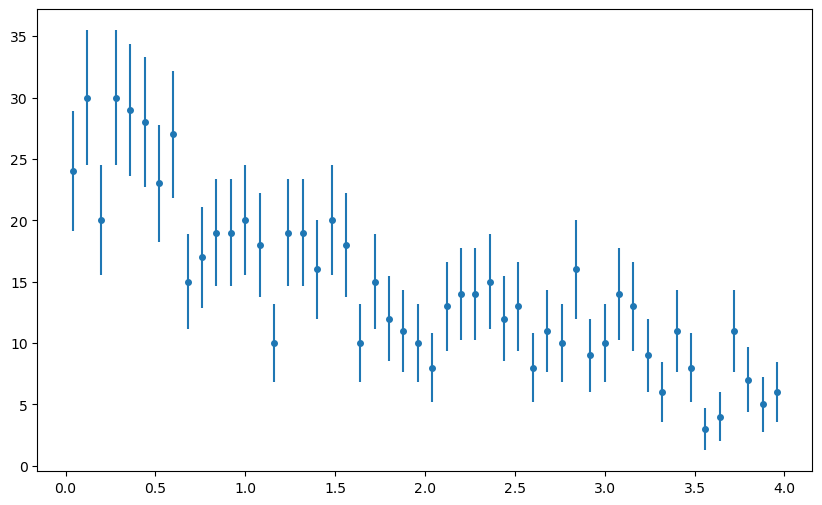

In [3]:
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', markersize=4)

In [6]:
# Define the model function
def expo(x, scale, lambda_):
    return scale * np.exp(-x/lambda_)

# Define the objective function to minimize (NLL)
def objective_nll(params, x, data):
    scale = params['scale']
    lambda_ = params['lambda_']
    mu = expo(x, scale, lambda_)
    # To avoid log(0) problems:
    mu = np.where(mu <= 0, 1e-10, mu)
    # Poisson log-likelihood (up to constant):
    ll = np.sum(data * np.log(mu) - mu)
    # Return -2 ln L (scalar):
    return -2.0 * ll


# Set up parameters with initial guesses
params = Parameters()
params.add('scale', value=np.max(counts))
params.add('lambda_', value=2)

Check our guess for the starting parameter values

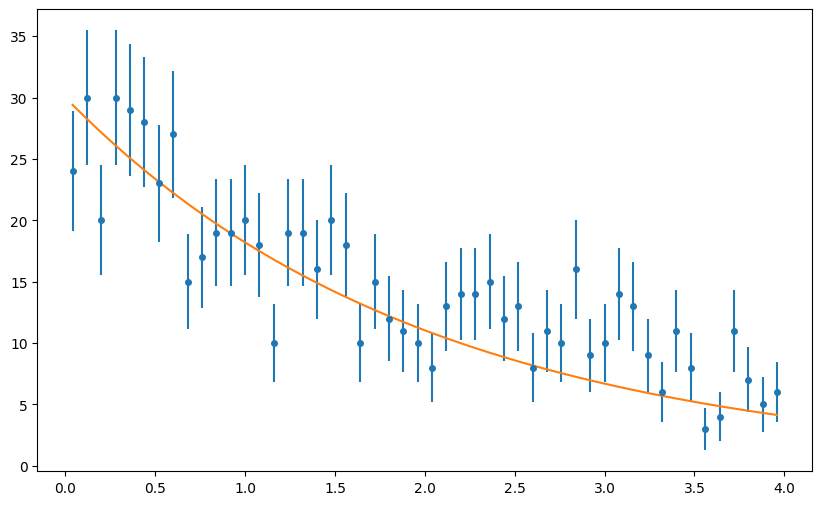

In [4]:
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', markersize=4)
plt.plot(bin_centers,expo(bin_centers,params['scale'].value,params['lambda_'].value))

The initial guess for the paraemter values looks pretty good.  Therfore the minimzer should be able to converge to a good minimum.

In [9]:
# Perform the fit
result = minimize(objective_nll, params, args = (bin_centers, counts), method = 'powell')

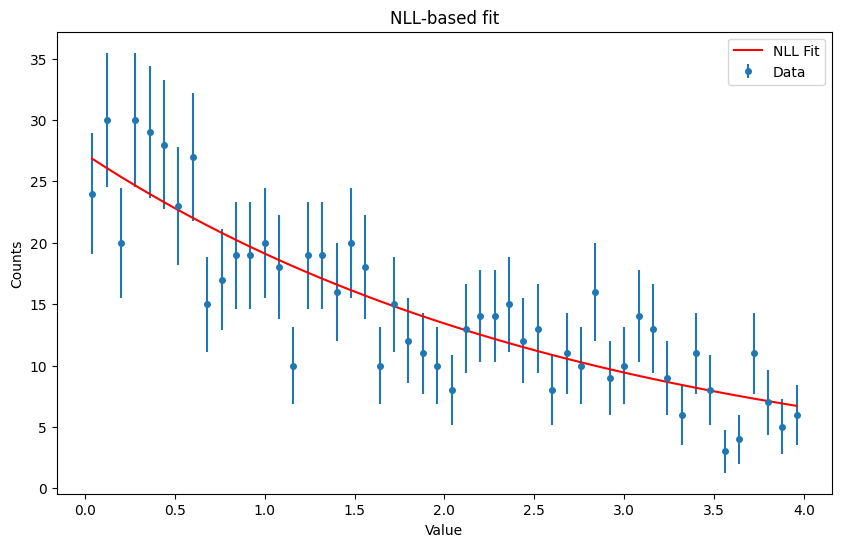

In [15]:
# Calculate the best fit curve
best_scale = result.params['scale'].value
best_lambda = result.params['lambda_'].value
best_fit = expo(bin_centers, best_scale, best_lambda)

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=np.sqrt(counts),
             fmt='o', markersize=4, label='Data')
plt.plot(bin_centers, best_fit, 'r-', label='NLL Fit')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.legend()
plt.title('NLL‐based fit')
plt.show()


In [12]:
# using the internal fit report
from lmfit import fit_report
print(fit_report(result))

[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 95
    # data points      = 1
    # variables        = 2
    chi-square         = 6573824.43
    reduced chi-square = 6573824.43
    Akaike info crit   = 19.6986063
    Bayesian info crit = 15.6986063
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    scale:    27.2289705 (init = 30)
    lambda_:  2.82831422 (init = 2)
